# 빅데이터 분석 특강 (14주차) 6월11일

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis, GAN]

### GAN (Generative Adversarial Network)

`-` 저자: 이안굿펠로우 (이름이 특이함. 좋은친구..) 
- 제가 추천한 딥러닝 교재의 저자 
- 천재임 
- 지도교수가 요수아 벤지오 

`-` 논문 NIPS, 저는 이 논문 읽고 소름돋았어요.. 
- https://arxiv.org/abs/1406.2661 (현재시점, 38751회 인용되었음)

`-` 최근 10년간 머신러닝 분야에서 가장 혁신적인 아이디어이다. (얀르쿤, 2014년 시점..) 

`-` 무슨내용? 생성모형 

#### 생성모형이란? (쉬운 설명)

> 만들수 없다면 이해하지 못한 것이다, 리처드 파인만 (천재 물리학자) 

`-` 사진속에 들어있는 동물이 개인지 고양이인지 맞출수 있는 기계와 개와 고양이를 그릴수 있는 기계중 어떤것이 더 시각적보에 대한 이해가 깊다고 볼수 있는가? 

`-` 진정으로 인공지능이 이미지를 이해했다면, 이미지를 만들수도 있어야 한다. $\to$ 이미지를 생성하는 모형을 만들어보자 $\to$ 성공 

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/Woman_1.jpg)

#### GAN의 응용분야

`-` 내가 찍은 사진이 피카소의 화풍으로 표현된다면?
- https://www.lgsl.kr/sto/stories/60/ALMA2020070001

`-` 퀸의 라이브에이드가 4k로 나온다면?

`-` 1920년대 서울의 모습이 칼라로 복원된다면? 

`-` 딥페이크: 유명인의 가짜 포르노, 가짜뉴스, 협박(거짓기소) 


`-` 게임영상 (파이널판타지)

`-` 거북이의 커버.. 

`-` 너무 많아요.....

#### 생성모형이란? 통계학과 버전의 설명 

> 제한된 정보만으로 어떤 문제를 풀 떄, 그 과정에서 원래의 문제보다 일반적인 문제를 풀지 말고, 가능한 원래의 문제를 직접 풀어야한다. 배프닉 (SVM 창시자) 

`-` 이미지 $\boldsymbol{x}$가 주어졌을 경우 라벨을 $y$라고 하자. 

`-` 이미지를 보고 라벨을 맞추는 일은 $p(y| \boldsymbol{x})$에 관심이 있다. 

`-` 이미지를 생성하는 일은 $p(\boldsymbol{x},y)$에 관심이 있는것이다. 

`-` 데이터의 생성확률 $p(\boldsymbol{x},y)$을 알면 클래스의 사후확률 $p(y|\boldsymbol{x})$를 알 수 있음. (아래의 수식 참고) 하지만 역은 불가능 

$$p(y|x) = \frac{p(x,y)}{p(x)} = \frac{p(x,y)}{\sum_{y}p(x,y)} $$

- 즉 이미지를 생성하는일은 분류문제보다 더 어려운 일이라 해석가능 

`-` 따라서 배프닉의 원리에 의하면 식별적 분류가 생성적 분류보다 바람직한 접근법이라 할 수 있음. 

`-` 하지만 다양한 현실문제에서 생성모형이 유용할떄가 많다. 

### GAN의 원리

`-` GAN은 생성모형중 하나임 

`-` GAN의 원리는 경찰과 위조지폐범이 서로 선의의(?) 경쟁을 통하여 서로 발전하는 모형으로 설명할 수 있다. 

> The generative model can be thought of as analogous to a team of counterfeiters,
trying to produce fake currency and use it without detection, while the discriminative model is
analogous to the police, trying to detect the counterfeit currency. Competition in this game drives
both teams to improve their methods until the counterfeits are indistiguishable from the genuine
articles.

`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜 가짜이미지를 만든다(generate) 

`-` 무식한 상황극.. 

- 위조범: 가짜돈을 만들어서 부자가 되어야지! (가짜돈을 그림) 
- 경찰: (위조범이 만든 돈을 보고) 이건 가짜다! 
- 위조범: 걸렸군.. 더 정교하게 만들어야지.. 
- 경찰: 이건 진짠가?... --> 상사에게 혼남. 그것도 구분못하냐고 
- 위조범: 더 정교하게 만들자.. 
- 경찰: 더 판별능력을 업그레이드 하자! 
- 반복.. 

`-` 굉장히 우수한 경찰조차도 진짜와 가짜를 구분하지 못할때(=진짜 이미지를 0.5의 확률로만 진짜라고 말할때 = 가짜 이미지를 0.5의 확률로만 가짜라고 말할때) 학습을 멈춘다. 

### 구현 

`-` 목표: 노이즈에서 mnist자료의 이미지를 생성하여 보자.

#### import

In [ ]:
import tensorflow as tf  
import tensorflow.experimental.numpy as tnp
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
tnp.experimental_enable_numpy_behavior()

#### 데이터

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
Xreal = x_train.reshape(-1,784)/255

#### 위조지폐범의 설계: noise -> 가짜이미지를 만들어내는 네트워크를 만들자. 

`-` 네트워크의 입력: 적당한 벡터 혹은 매트릭스에 노이즈 (랜덤으로 생성한 어떠한 숫자) 를 채운 것 

`-` 네트워크의 출력: (28,28) shape의 매트릭스 혹은 784개의 원소를 가지는 벡터 

In [ ]:
net_counterfeiter= tf.keras.Sequential()
net_counterfeiter.add(tf.keras.layers.Dense(256,activation='relu'))
net_counterfeiter.add(tf.keras.layers.Dense(512,activation='relu'))
net_counterfeiter.add(tf.keras.layers.Dense(1024,activation='relu'))
net_counterfeiter.add(tf.keras.layers.Dense(784))

2022-06-09 12:43:21.685836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


#### 경찰의 설계: 진짜이미지는 1, 가짜이미지는 0으로 판별하는 DNN을 만들자. 

`-` 네트워크의 입력?
- X: (28,28) shape의 matrix 혹은 784개의 원소를 가지는 벡터

`-` 네트워크의 출력? yhat 
- yhat은 진짜이미지일수록1, 가짜이미지일수록 0이 되어야 한다. (왜냐하면 y가 진짜이미지이면 1, 가짜이미지이면 0 이므로)

In [ ]:
net_police = tf.keras.Sequential()
net_police.add(tf.keras.layers.Dense(1024,activation='relu'))
net_police.add(tf.keras.layers.Dropout(0.3))
net_police.add(tf.keras.layers.Dense(512,activation='relu'))
net_police.add(tf.keras.layers.Dropout(0.3))
net_police.add(tf.keras.layers.Dense(256,activation='relu'))
net_police.add(tf.keras.layers.Dropout(0.3))               
net_police.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#### 일단 스토리를 계속 진행해보겠습니다. 

`-` 진짜 이미지가 아래와 같이 있다. 

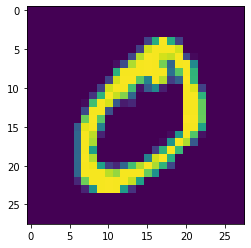

In [ ]:
plt.imshow(Xreal[1].reshape(28,28))

`-` 이 이미지를 경찰이 봤습니다 -> yhat이 나와야 하고, yhat $\approx$ 1 이어야 한다. (왜? 진짜 이미지니까)

In [ ]:
policehat_from_realimage = net_police(Xreal)
policehat_from_realimage

<tf.Tensor: shape=(60000, 1), dtype=float32, numpy=
array([[0.4638827 ],
       [0.45302874],
       [0.50195265],
       ...,
       [0.4384173 ],
       [0.48654714],
       [0.53714067]], dtype=float32)>

- 진짜 이미지이므로 위의 값들이 모두 1이어야함. 즉 yhat $\approx$ 1 이어야 좋은 것임 
- 하지만 그렇지 못함 (배운것이 없는 무능한 경찰)

`-` 이번에는 가짜 이미지를 경찰이 봤다고 생각하자. 

(step1) 랜덤으로 아무숫자나 생성한다. 

In [ ]:
Noise1=tnp.random.randn(10).reshape(1,10)

(step2) 위조범을 시켜서 이미지를 생성시킨다. 

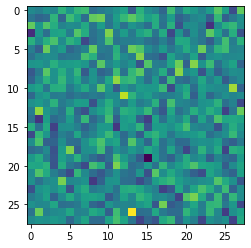

In [ ]:
Xfake1 = net_counterfeiter(Noise1)
plt.imshow(Xfake1.reshape(28,28))

(step3) 위조범이 생성한 이미지를 경찰한테 넘겨본다. 

In [ ]:
policehat_from_Xfake1 = net_police(Xfake1)
policehat_from_Xfake1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.49095842]], dtype=float32)>

`-` 경찰의 실력도 형편없고 위조범의 실력도 형편없다. 

### 경찰네트워크의 실력을 향상하자 

`-` 데이터정리 
- 원래 n=60000개의 real image가 있음. 이 자료중 일부를 batch_size=500 만큼 뽑아 이것을 ${\bf X}_{batch}$라고 하자. 따라서 ${\bf X}_{batch}$의 차원은 (500,784) 이다. 
- 위조범이 만든 가짜자료를 원래자료의 batch_size와 같은 숫자인 500만큼 만듬. 그리고 이것을 ${\bf \tilde X}_{batch}$라고 하자. 그러면 ${\bf \tilde X}_{batch}$의 차원은 (500,784)이다. 
- 진짜자료는 1, 가짜자료는 0으로 라벨링

In [ ]:
batch_size = 500

In [ ]:
Noise_batch = np.random.normal(0,1,size=(batch_size,10))
Xfake_batch = net_counterfeiter(Noise_batch)

In [ ]:
Xreal_batch = Xreal[:batch_size]
Xpolice_batch = tf.concat([Xreal_batch,Xfake_batch],axis=0)

In [ ]:
ypolice_batch = np.zeros(2*batch_size) 
ypolice_batch[:batch_size] = 1

`-` 학습전: yhat(경찰의 예측)을 관찰

In [ ]:
net_police(Xreal_batch)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.46388364],
       [0.45302677],
       [0.50195265],
       [0.543617  ],
       [0.44746903]], dtype=float32)>

In [ ]:
net_police(Xfake_batch)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.49146503],
       [0.49262333],
       [0.49713606],
       [0.494118  ],
       [0.50205135]], dtype=float32)>

`-` 학습하자: compile and fit 

In [ ]:
net_police.compile(loss=tf.losses.binary_crossentropy, optimizer='adam') 

In [ ]:
net_police.fit(Xpolice_batch,ypolice_batch)

32/32 [==============================] - 0s 1ms/step - loss: 0.0591


`-` 훈련된 경찰의 성능을 살펴보자. 

In [ ]:
net_police(Xreal_batch)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
net_police(Xfake_batch)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[6.4868483e-13],
       [1.3337571e-19],
       [2.0222801e-11],
       [1.7586674e-22],
       [5.3691273e-20]], dtype=float32)>

### 위조범네트워크의 성능을 향상시키자. 

`-` 자료구조: 네트워크의 입력은 임의의 노이즈, 네트워크의 출력은 fakeimage

`-` 손실함수의 설계?
- 위조범 네트워크의 출력은 fakeimage, 위조범 네트워크의 yhat은 fakeimage 이다!
- 이 가짜이미지를 (위조범네트워크의 yhat을) 경찰이 진짜라고 판단해야 위조범 입장에서는 좋은것. 즉 "경찰네트워크(위조범네트워크의yhat) $\approx$ 1" 이어야 함 

In [ ]:
def loss_counterfeiter(y,yhat): 
    # note that yhat is fake image! 
    return tf.losses.binary_crossentropy(y,net_police(yhat)) # here label should be 1 

In [ ]:
ycounterfeiter_batch = np.ones(batch_size) 
net_counterfeiter.compile(loss=loss_counterfeiter,optimizer = 'adam')

In [ ]:
net_counterfeiter.fit(Noise_batch, ycounterfeiter_batch)

16/16 [==============================] - 0s 1ms/step - loss: 2.0207


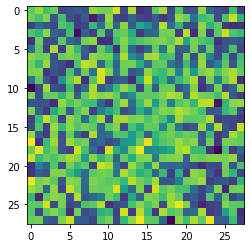

In [ ]:
plt.imshow(net_counterfeiter(Noise1).reshape(28,28))

- 학습된 이미지의 하나의 샘플 (아직 노이즈같음) 

In [ ]:
net_police(net_counterfeiter(Noise_batch))[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

- 노이즈같지만 아무튼 이정도로도 경찰은 속는다!

### 두 적대적 네트워크를 경쟁시키자. 

In [ ]:
for _ in tqdm(range(500)):
    # step1: 가짜이미지 생성, 데이터정리 
    Noise_batch = np.random.normal(0,1,size=(batch_size,10))
    Xfake_batch = net_counterfeiter(Noise_batch)
    Xreal_batch = Xreal[np.random.randint(0,Xreal.shape[0],size=batch_size)]
    
    # step2: 경찰네트워크용 데이터 정리 
    Xpolice_batch = tf.concat([Xreal_batch,Xfake_batch],axis=0)
    ypolice_batch = np.zeros(2*batch_size)
    ypolice_batch[:batch_size] = 1 
    
    # step3: 경찰네트워크 훈련
    net_police.fit(Xpolice_batch,ypolice_batch,verbose=0) 
    
    # step4: 위조범네트워크 훈련 
    Xcounterfeiter_batch = Noise_batch # <- 위조범 네트워크의 X 
    ycounterfeiter_batch = np.ones(batch_size) # <- 위조범네트워크의 y 
    net_counterfeiter.fit(Noise_batch, ycounterfeiter_batch, verbose=0) 


100%|██████████| 500/500 [00:48<00:00, 10.25it/s]


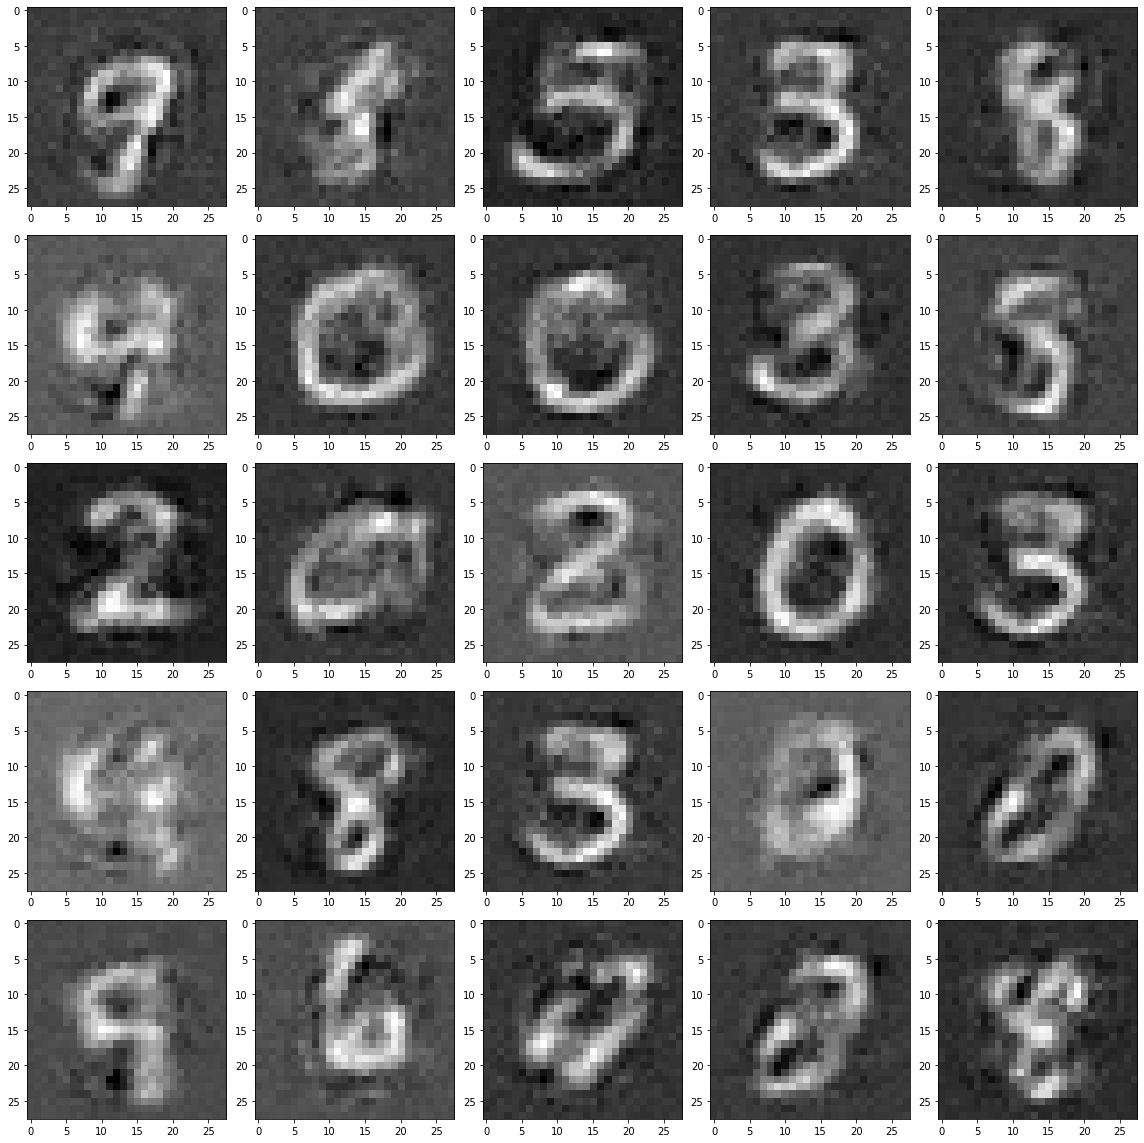

In [ ]:
fig, ax = plt.subplots(5,5)
k=0
for i in range(5):
    for j in range(5): 
        ax[i][j].imshow(net_counterfeiter.predict(Noise_batch)[k].reshape(28,28),cmap='gray')
        k=k+1
fig.set_figwidth(16)
fig.set_figheight(16)
fig.tight_layout()